CREDIT CARD FRAUD DETECTION - EXPLORATORY DATA ANALYSIS

📁 1. SETTING UP PATHS
--------------------------------------------------
Current directory: c:\Users\321\Desktop\Kaleb\AI\Week5\fraud-detection\notebooks
✓ Directory ready: c:\Users\321\Desktop\Kaleb\AI\Week5\fraud-detection\data\raw
✓ Directory ready: c:\Users\321\Desktop\Kaleb\AI\Week5\fraud-detection\data\processed
✓ Directory ready: c:\Users\321\Desktop\Kaleb\AI\Week5\fraud-detection\notebooks\visualizations

📁 2. LOADING CREDIT CARD DATASET
--------------------------------------------------
✅ Dataset loaded successfully!
   File: creditcard.csv
   Shape: (284807, 31)

📊 DATASET OVERVIEW:
--------------------------------------------------
Number of transactions: 284,807
Number of features: 31
Features: Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class

First 5 rows of the dataset:
   Time        V1        V2        V3        V

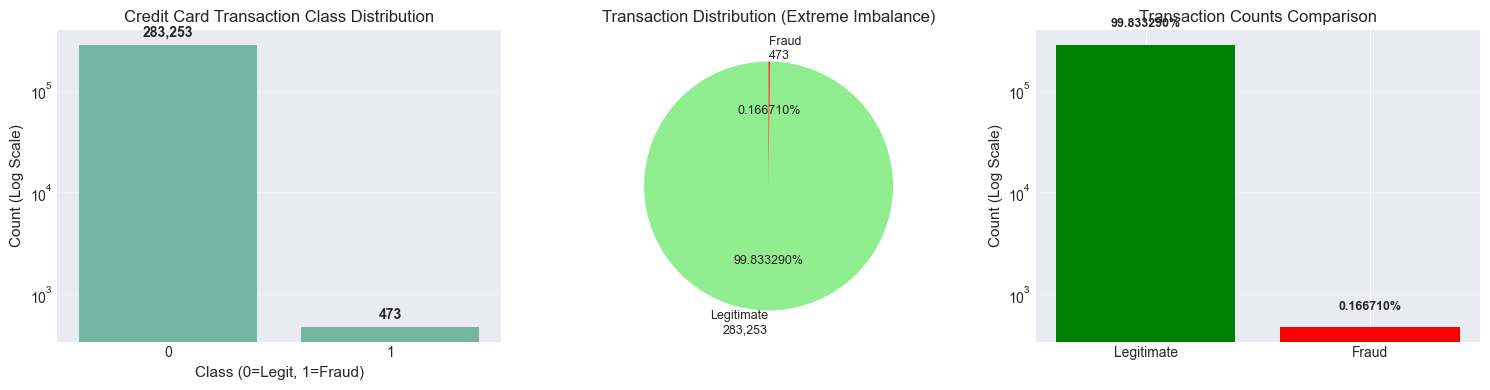


💡 Insight: Extreme class imbalance - only 0.166710% of transactions are fraudulent
This is typical for credit card fraud detection but challenging for model training.

📈 5. UNIVARIATE ANALYSIS
--------------------------------------------------

⏰ 5.1 Time Feature Analysis
------------------------------
Time represents seconds elapsed between transaction and first transaction in dataset
Time range: 0 to 172,792 seconds
   (48.0 hours total duration)
   (2.0 days total duration)
💾 Visualization saved to: c:\Users\321\Desktop\Kaleb\AI\Week5\fraud-detection\notebooks\visualizations\creditcard_time_analysis.png


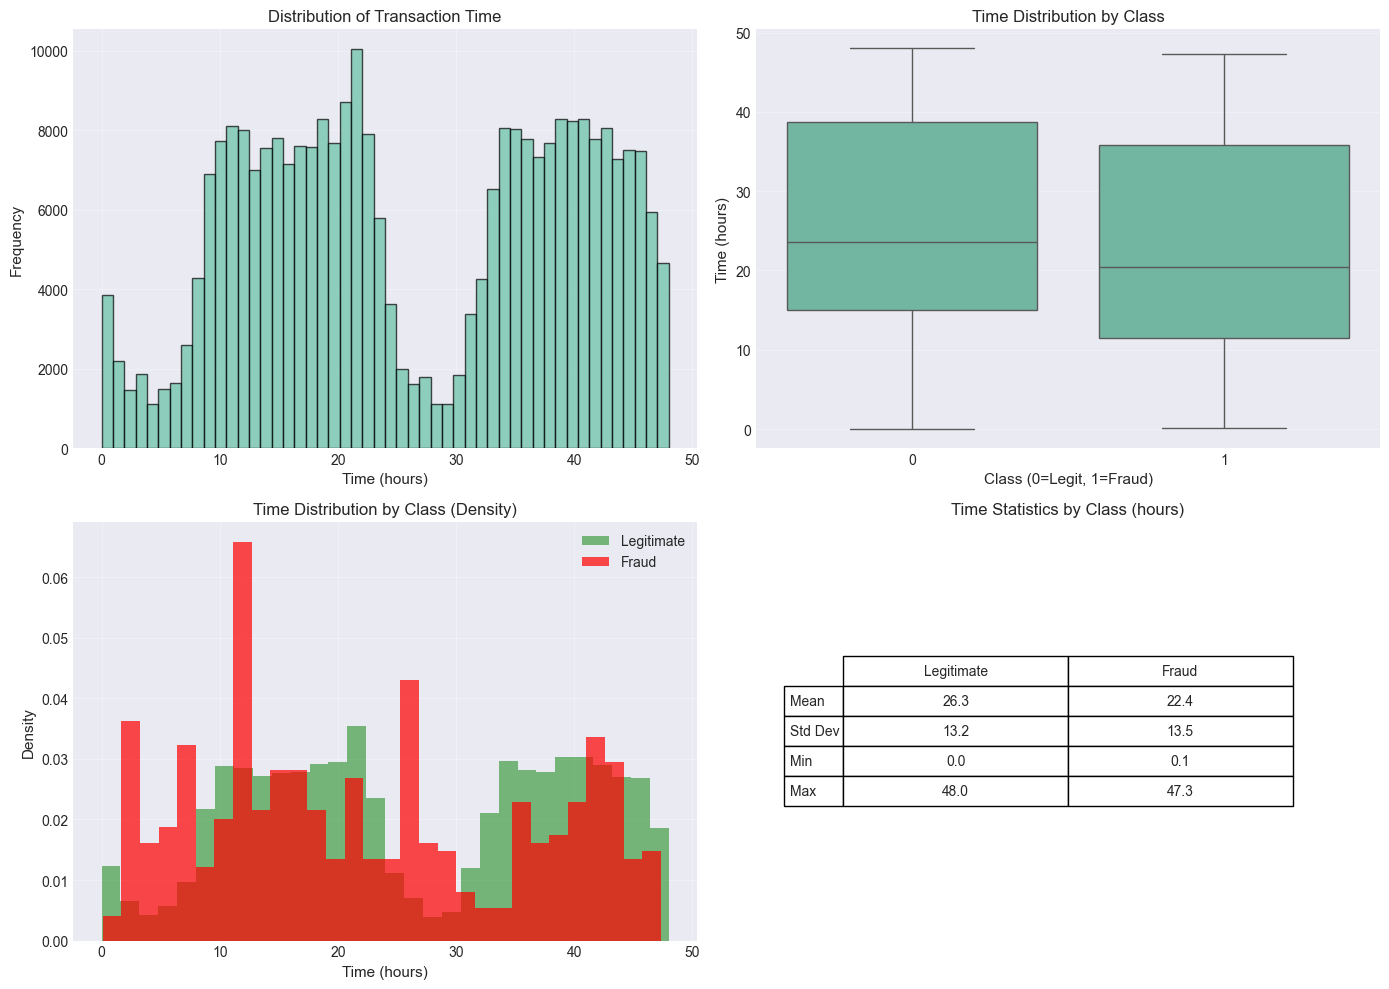


📊 Time Statistics by Class (hours):


,count,mean,std,min,max
Class,,,,,
0,283253,26.34,13.19,0.00,48.00
1,473,22.35,13.51,0.11,47.32



💰 5.2 Amount Feature Analysis
------------------------------
Transaction Amount in dollars
Amount range: $0.00 to $25691.16
💾 Visualization saved to: c:\Users\321\Desktop\Kaleb\AI\Week5\fraud-detection\notebooks\visualizations\creditcard_amount_analysis.png


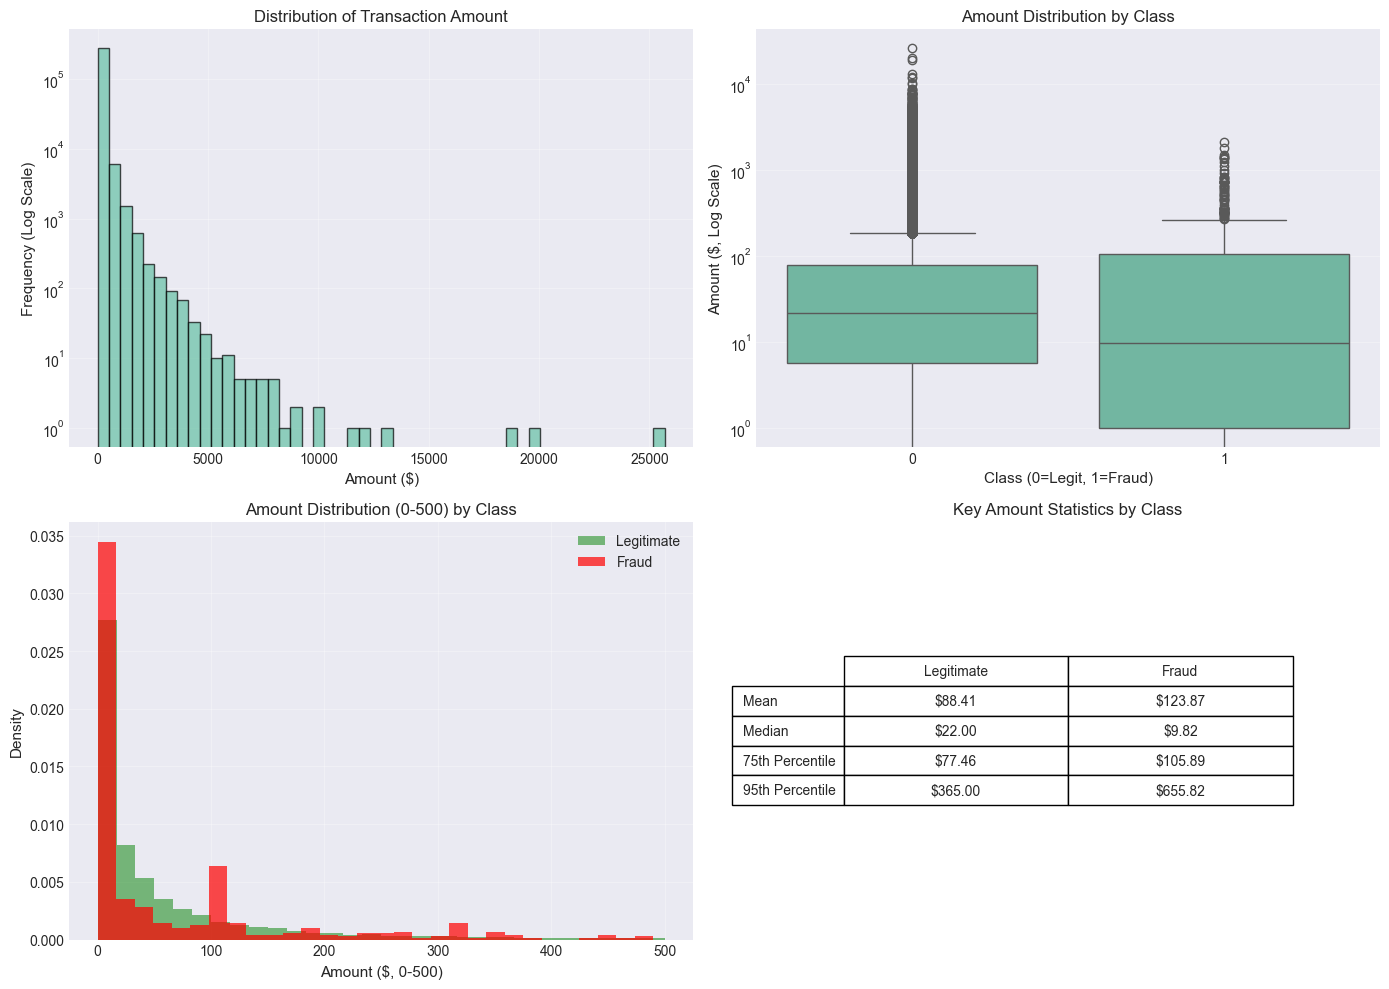


📊 Amount Statistics by Class:


,count,mean,std,min,max,25th,median,75th,95th
Class,,,,,,,,,
0,283253,88.41,250.38,0.0,25691.16,5.67,22.00,77.46,365.00
1,473,123.87,260.21,0.0,2125.87,1.00,9.82,105.89,655.82



🔢 5.3 PCA Features Analysis (V1-V28)
------------------------------
V1-V28 are anonymized PCA-transformed features
Let's analyze their distributions and relationships with fraud
💾 Visualization saved to: c:\Users\321\Desktop\Kaleb\AI\Week5\fraud-detection\notebooks\visualizations\creditcard_pca_features.png


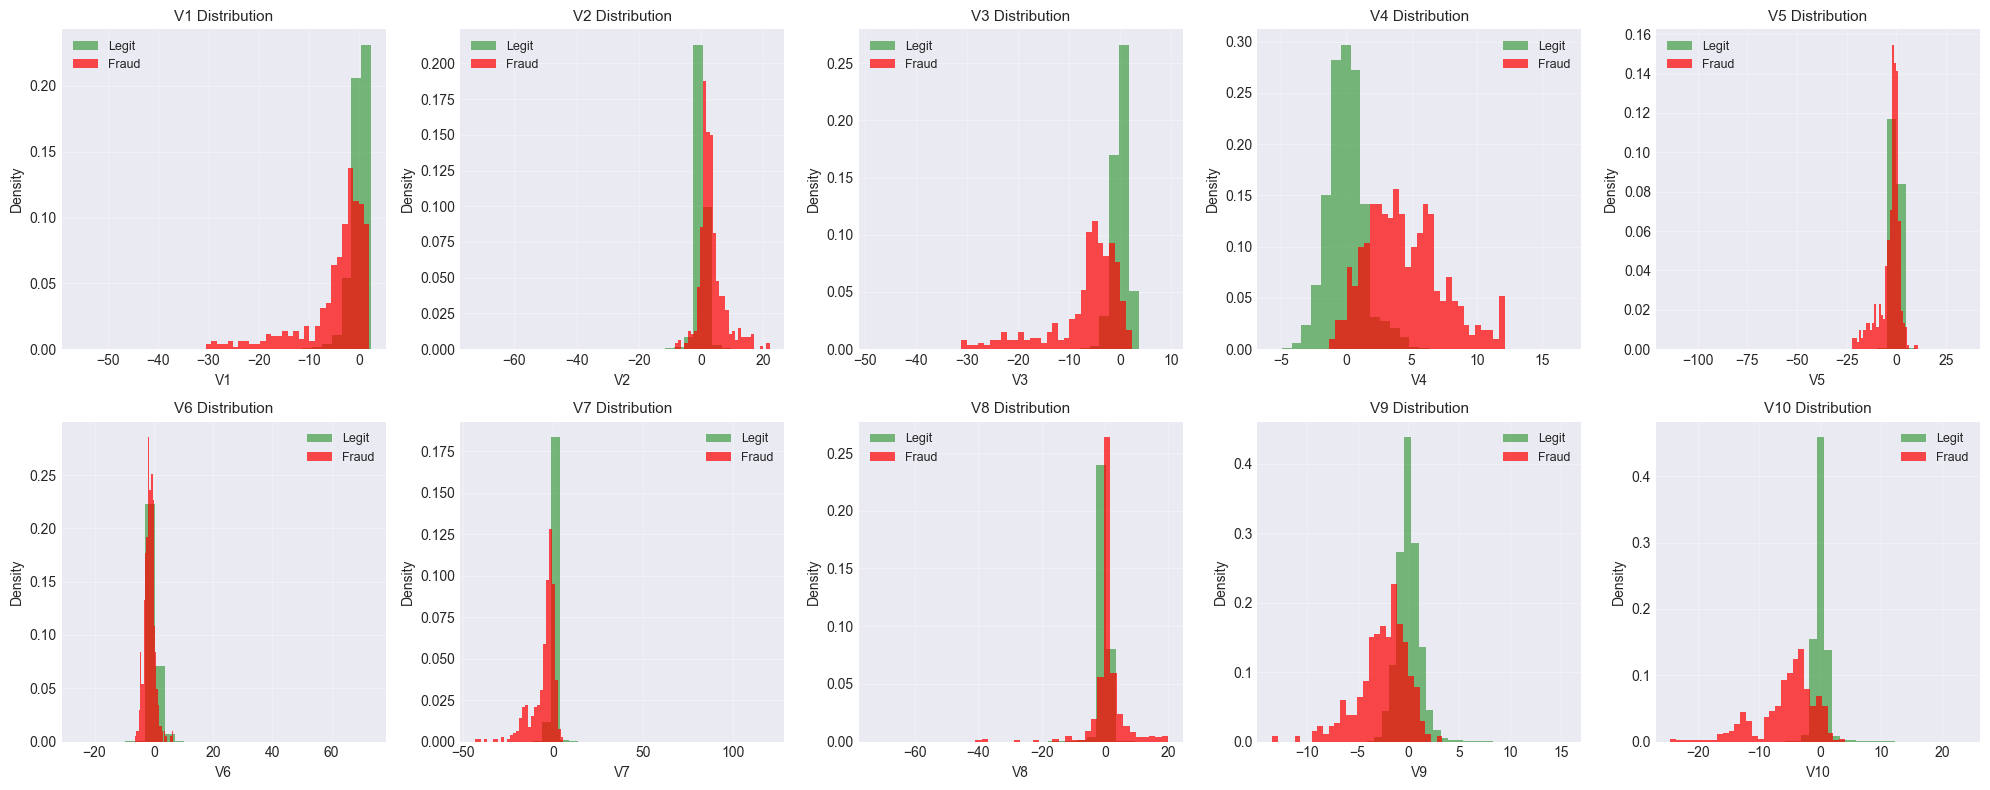


📊 PCA Features Summary Statistics (first 10):
                V1           V2           V3           V4           V5  \
count  283726.0000  283726.0000  283726.0000  283726.0000  283726.0000   
mean        0.0059      -0.0041       0.0016      -0.0030       0.0018   
std         1.9480       1.6467       1.5087       1.4142       1.3770   
min       -56.4075     -72.7157     -48.3256      -5.6832    -113.7433   
25%        -0.9160      -0.6003      -0.8897      -0.8501      -0.6898   
50%         0.0204       0.0639       0.1800      -0.0222      -0.0535   
75%         1.3161       0.8003       1.0270       0.7396       0.6122   
max         2.4549      22.0577       9.3826      16.8753      34.8017   

                V6           V7           V8           V9          V10  
count  283726.0000  283726.0000  283726.0000  283726.0000  283726.0000  
mean       -0.0011       0.0018      -0.0009      -0.0016      -0.0014  
std         1.3319       1.2277       1.1791       1.0955       1.0

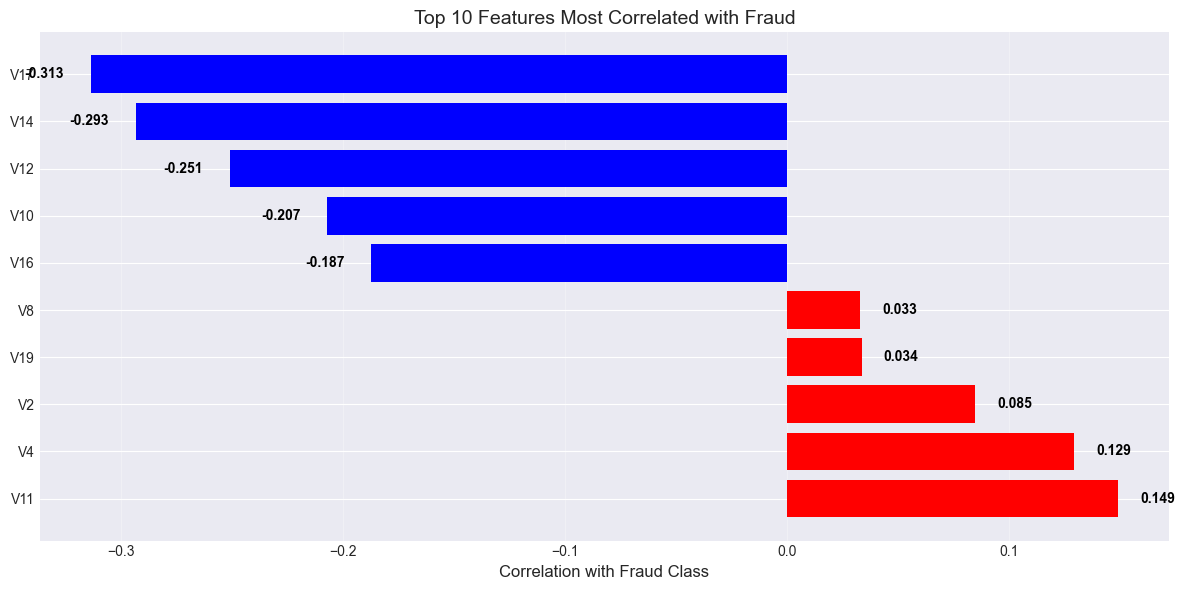


📊 6.2 Key Feature Relationships
------------------------------
💾 Visualization saved to: c:\Users\321\Desktop\Kaleb\AI\Week5\fraud-detection\notebooks\visualizations\creditcard_scatter_relationships.png


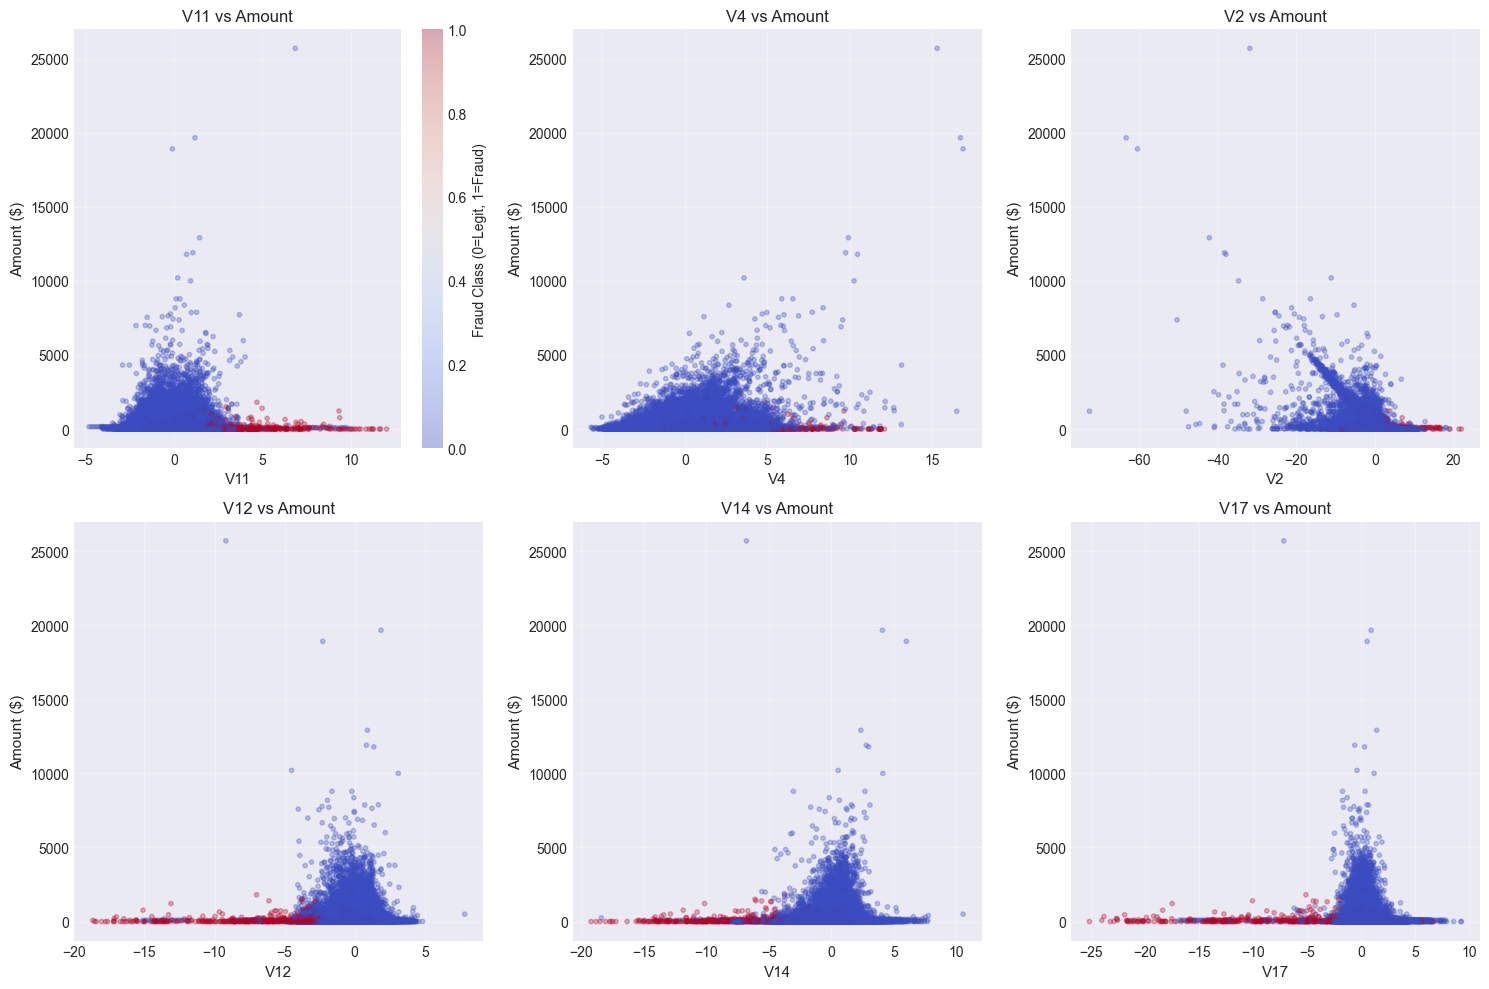


📊 6.3 Time vs Amount Analysis
------------------------------
💾 Visualization saved to: c:\Users\321\Desktop\Kaleb\AI\Week5\fraud-detection\notebooks\visualizations\creditcard_time_amount_analysis.png


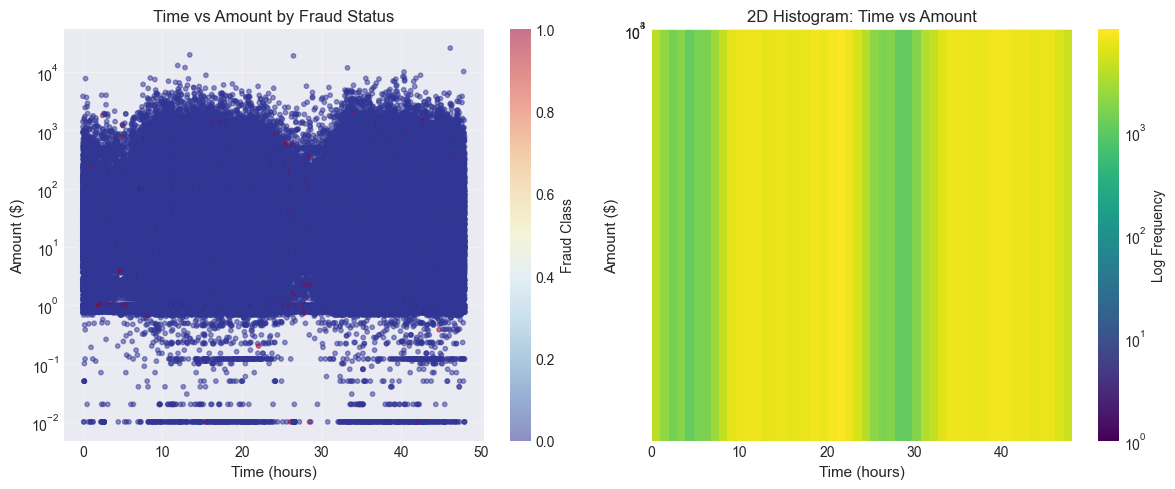


📋 7. COMPREHENSIVE SUMMARY
--------------------------------------------------

🔑 KEY FINDINGS:
   • 1. Extreme Class Imbalance: Fraud rate = 0.166710% (1 in 599 transactions)
   • 2. Dataset Characteristics: 283,726 transactions, 33 features
   • 3. Transaction Amounts: Fraud mean = $123.87, Legit mean = $88.41
   • 4. Time Patterns: Fraud occurs throughout 48.0 hour period
   • 5. PCA Features: V1-V28 show varying correlations with fraud (|corr| up to 0.149)
   • 6. Data Quality: No missing values, 1,081 duplicates removed
   • 7. Amount Distribution: Highly skewed (mean $88.47, max $25691.16)

🎯 CHALLENGES FOR MODELING:
   • 1. Extreme class imbalance requires specialized techniques
   • 2. Anonymized PCA features limit business interpretability
   • 3. Time feature represents elapsed seconds (not cyclical time)
   • 4. Amount feature has highly skewed distribution
   • 5. Very small fraud sample size for training

💡 RECOMMENDATIONS FOR MODELING:
   • 1. Use stratified sampling, cla

In [2]:
# ==================== CREDIT CARD FRAUD DETECTION - EDA ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from pathlib import Path

warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")

print("="*70)
print("CREDIT CARD FRAUD DETECTION - EXPLORATORY DATA ANALYSIS")
print("="*70)

# ==================== 1. SETUP PATHS ====================
print("\n📁 1. SETTING UP PATHS")
print("-"*50)

# Get current directory
BASE_DIR = Path.cwd()
print(f"Current directory: {BASE_DIR}")

# Define paths
RAW_DATA_DIR = BASE_DIR.parent / "data" / "raw"
PROCESSED_DIR = BASE_DIR.parent / "data" / "processed"
VISUALIZATIONS_DIR = BASE_DIR / "visualizations"

# Create directories if they don't exist
for directory in [RAW_DATA_DIR, PROCESSED_DIR, VISUALIZATIONS_DIR]:
    directory.mkdir(parents=True, exist_ok=True)
    print(f"✓ Directory ready: {directory}")

# ==================== 2. LOAD AND INSPECT DATA ====================
print("\n📁 2. LOADING CREDIT CARD DATASET")
print("-"*50)

# Load the credit card dataset
creditcard_file = RAW_DATA_DIR / "creditcard.csv"

if not creditcard_file.exists():
    print(f"❌ File not found: {creditcard_file}")
    # Try alternative locations
    alternative_paths = [
        BASE_DIR / "creditcard.csv",
        Path("creditcard.csv"),
        BASE_DIR.parent / "creditcard.csv"
    ]
    
    for alt_path in alternative_paths:
        if alt_path.exists():
            creditcard_file = alt_path
            print(f"✓ Found file at: {creditcard_file}")
            break
    
    if not creditcard_file.exists():
        print("❌ Could not find creditcard.csv")
        print("Please download it from: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")
        print("And place it in: data/raw/")
        exit(1)

try:
    cc_df = pd.read_csv(creditcard_file)
    print("✅ Dataset loaded successfully!")
    print(f"   File: {creditcard_file.name}")
    print(f"   Shape: {cc_df.shape}")
except Exception as e:
    print(f"❌ Error loading file: {e}")
    exit(1)

print("\n📊 DATASET OVERVIEW:")
print("-"*50)

# Display basic information
print(f"Number of transactions: {len(cc_df):,}")
print(f"Number of features: {len(cc_df.columns)}")
print(f"Features: {', '.join(cc_df.columns.tolist())}")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(cc_df.head().to_string())

print("\nDataset information:")
print(f"Memory usage: {cc_df.memory_usage().sum() / 1024**2:.2f} MB")
print("\nData types:")
for col in cc_df.columns:
    print(f"  • {col}: {cc_df[col].dtype}")

# ==================== 3. DATA CLEANING ====================
print("\n🧹 3. DATA CLEANING")
print("-"*50)

# 3.1 Check for missing values
print("\n🔍 3.1 Checking for missing values...")
missing_values = cc_df.isna().sum()
missing_total = missing_values.sum()

if missing_total > 0:
    print(f"❌ Found {missing_total} missing values:")
    missing_cols = missing_values[missing_values > 0]
    for col, count in missing_cols.items():
        percentage = (count / len(cc_df)) * 100
        print(f"   • {col}: {count:,} missing values ({percentage:.4f}%)")
    
    # Handle missing values
    print("\n🔄 Handling missing values...")
    for col in missing_cols.index:
        if cc_df[col].dtype in ['float64', 'int64']:
            # For numeric columns, fill with median
            median_val = cc_df[col].median()
            cc_df[col] = cc_df[col].fillna(median_val)
            print(f"   • {col}: Filled with median ({median_val:.4f})")
        else:
            # For categorical, fill with mode
            mode_val = cc_df[col].mode()[0]
            cc_df[col] = cc_df[col].fillna(mode_val)
            print(f"   • {col}: Filled with mode ({mode_val})")
else:
    print("✅ No missing values found!")

# 3.2 Check for duplicates
print("\n🔍 3.2 Checking for duplicate transactions...")
initial_count = len(cc_df)
duplicate_mask = cc_df.duplicated()
duplicate_count = duplicate_mask.sum()

if duplicate_count > 0:
    print(f"❌ Found {duplicate_count:,} duplicate rows ({duplicate_count/initial_count*100:.4f}%)")
    
    # Check if duplicates include fraud cases
    fraud_duplicates = cc_df[duplicate_mask & (cc_df['Class'] == 1)].shape[0]
    if fraud_duplicates > 0:
        print(f"   ⚠️  Includes {fraud_duplicates:,} fraudulent transactions!")
    
    # Remove duplicates
    cc_df = cc_df.drop_duplicates()
    print(f"   Removed duplicates. New shape: {cc_df.shape}")
    print(f"   Remaining transactions: {len(cc_df):,}")
else:
    print("✅ No duplicate transactions found!")

# 3.3 Check data types
print("\n🔍 3.3 Checking data types...")
print("Current data types:")
type_summary = cc_df.dtypes.value_counts()
for dtype, count in type_summary.items():
    print(f"   • {dtype}: {count} columns")

# Convert any object types if needed
object_cols = cc_df.select_dtypes(include=['object']).columns
if len(object_cols) > 0:
    print(f"\n🔄 Converting {len(object_cols)} object columns to numeric...")
    for col in object_cols:
        try:
            cc_df[col] = pd.to_numeric(cc_df[col], errors='coerce')
            # Check if conversion created new missing values
            new_missing = cc_df[col].isna().sum()
            if new_missing > 0:
                cc_df[col] = cc_df[col].fillna(cc_df[col].median())
                print(f"   • {col}: Converted to numeric, filled {new_missing} NaN with median")
            else:
                print(f"   • {col}: Successfully converted to numeric")
        except Exception as e:
            print(f"   • {col}: Could not convert to numeric - {e}")

print("\n✅ Data cleaning completed!")
print(f"   Final dataset shape: {cc_df.shape}")
print(f"   Memory usage: {cc_df.memory_usage().sum() / 1024**2:.2f} MB")

# ==================== 4. CLASS DISTRIBUTION ANALYSIS ====================
print("\n⚖️ 4. CLASS DISTRIBUTION ANALYSIS")
print("-"*50)

# Analyze the target variable 'Class'
print("Target variable 'Class': 0 = Legitimate, 1 = Fraud")

class_counts = cc_df['Class'].value_counts()
class_percent = cc_df['Class'].value_counts(normalize=True) * 100

print(f"\n📊 Class Distribution:")
print(f"   Legitimate transactions (Class 0): {class_counts[0]:,} ({class_percent[0]:.6f}%)")
print(f"   Fraudulent transactions (Class 1): {class_counts[1]:,} ({class_percent[1]:.6f}%)")
print(f"   Imbalance ratio: {class_counts[0]/class_counts[1]:.1f}:1")

# Save class distribution to file for reference
class_dist_file = PROCESSED_DIR / "creditcard_class_distribution.txt"
with open(class_dist_file, 'w') as f:
    f.write("Credit Card Dataset - Class Distribution\n")
    f.write("="*50 + "\n\n")
    f.write(f"Total transactions: {len(cc_df):,}\n")
    f.write(f"Legitimate (Class 0): {class_counts[0]:,} ({class_percent[0]:.6f}%)\n")
    f.write(f"Fraudulent (Class 1): {class_counts[1]:,} ({class_percent[1]:.6f}%)\n")
    f.write(f"Imbalance ratio: {class_counts[0]/class_counts[1]:.1f}:1\n")

print(f"\n💾 Class distribution saved to: {class_dist_file}")

# Visualize class distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Count plot
sns.countplot(x='Class', data=cc_df, ax=axes[0])
axes[0].set_title('Credit Card Transaction Class Distribution', fontsize=12)
axes[0].set_xlabel('Class (0=Legit, 1=Fraud)', fontsize=11)
axes[0].set_ylabel('Count (Log Scale)', fontsize=11)
axes[0].set_yscale('log')  # Use log scale due to extreme imbalance
axes[0].grid(axis='y', alpha=0.3)

# Add count labels
for i, count in enumerate(class_counts.values):
    axes[0].text(i, count * 1.2, f'{count:,}', ha='center', fontsize=10, fontweight='bold')

# Pie chart
fraud_pie_data = [class_counts[0], class_counts[1]]
labels = [f'Legitimate\n{class_counts[0]:,}', f'Fraud\n{class_counts[1]:,}']
colors = ['lightgreen', 'red']

axes[1].pie(fraud_pie_data, labels=labels, colors=colors, 
           autopct=lambda pct: f'{pct:.6f}%' if pct > 0.1 else '',
           startangle=90, textprops={'fontsize': 9})
axes[1].set_title('Transaction Distribution (Extreme Imbalance)', fontsize=12)

# Bar chart with actual numbers
bars = axes[2].bar(['Legitimate', 'Fraud'], [class_counts[0], class_counts[1]], 
                  color=['green', 'red'])
axes[2].set_title('Transaction Counts Comparison', fontsize=12)
axes[2].set_ylabel('Count (Log Scale)', fontsize=11)
axes[2].set_yscale('log')
axes[2].grid(axis='y', alpha=0.3)

# Add percentage labels
for i, (bar, count, percent) in enumerate(zip(bars, class_counts.values, class_percent.values)):
    axes[2].text(bar.get_x() + bar.get_width()/2, count * 1.5, 
                f'{percent:.6f}%', ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()

# Save the visualization
viz_path = VISUALIZATIONS_DIR / "creditcard_class_distribution.png"
plt.savefig(viz_path, dpi=300, bbox_inches='tight')
print(f"💾 Visualization saved to: {viz_path}")
plt.show()

print(f"\n💡 Insight: Extreme class imbalance - only {class_percent[1]:.6f}% of transactions are fraudulent")
print(f"This is typical for credit card fraud detection but challenging for model training.")

# ==================== 5. UNIVARIATE ANALYSIS ====================
print("\n📈 5. UNIVARIATE ANALYSIS")
print("-"*50)

# 5.1 Analyze Time feature
print("\n⏰ 5.1 Time Feature Analysis")
print("-"*30)

print(f"Time represents seconds elapsed between transaction and first transaction in dataset")
print(f"Time range: {cc_df['Time'].min():,.0f} to {cc_df['Time'].max():,.0f} seconds")
print(f"   ({cc_df['Time'].max()/3600:.1f} hours total duration)")
print(f"   ({cc_df['Time'].max()/86400:.1f} days total duration)")

# Convert Time to hours and days for better interpretation
cc_df['Time_hours'] = cc_df['Time'] / 3600
cc_df['Time_days'] = cc_df['Time'] / 86400

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram of Time in hours
axes[0, 0].hist(cc_df['Time_hours'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Time (hours)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of Transaction Time', fontsize=12)
axes[0, 0].grid(alpha=0.3)

# Box plot of Time by Class
sns.boxplot(x='Class', y='Time_hours', data=cc_df, ax=axes[0, 1])
axes[0, 1].set_xlabel('Class (0=Legit, 1=Fraud)', fontsize=11)
axes[0, 1].set_ylabel('Time (hours)', fontsize=11)
axes[0, 1].set_title('Time Distribution by Class', fontsize=12)
axes[0, 1].grid(axis='y', alpha=0.3)

# Time distribution by class (histogram)
axes[1, 0].hist(cc_df[cc_df['Class'] == 0]['Time_hours'], bins=30, alpha=0.5, 
                label='Legitimate', color='green', density=True)
axes[1, 0].hist(cc_df[cc_df['Class'] == 1]['Time_hours'], bins=30, alpha=0.7, 
                label='Fraud', color='red', density=True)
axes[1, 0].set_xlabel('Time (hours)', fontsize=11)
axes[1, 0].set_ylabel('Density', fontsize=11)
axes[1, 0].set_title('Time Distribution by Class (Density)', fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Time statistics table
time_stats = cc_df.groupby('Class')['Time_hours'].agg(['count', 'mean', 'std', 'min', 'max'])
time_stats = time_stats.round(2)

# Create table visualization
cell_text = []
for col in ['mean', 'std', 'min', 'max']:
    cell_text.append([f'{time_stats.loc[0, col]:.1f}', f'{time_stats.loc[1, col]:.1f}'])

axes[1, 1].axis('tight')
axes[1, 1].axis('off')
table = axes[1, 1].table(cellText=cell_text,
                         rowLabels=['Mean', 'Std Dev', 'Min', 'Max'],
                         colLabels=['Legitimate', 'Fraud'],
                         cellLoc='center',
                         loc='center',
                         colWidths=[0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
axes[1, 1].set_title('Time Statistics by Class (hours)', fontsize=12)

plt.tight_layout()

# Save the visualization
viz_path = VISUALIZATIONS_DIR / "creditcard_time_analysis.png"
plt.savefig(viz_path, dpi=300, bbox_inches='tight')
print(f"💾 Visualization saved to: {viz_path}")
plt.show()

# Display time statistics
print("\n📊 Time Statistics by Class (hours):")
display(time_stats)

# 5.2 Analyze Amount feature
print("\n💰 5.2 Amount Feature Analysis")
print("-"*30)

print(f"Transaction Amount in dollars")
print(f"Amount range: ${cc_df['Amount'].min():.2f} to ${cc_df['Amount'].max():.2f}")

# Calculate amount statistics
amount_stats = cc_df.groupby('Class')['Amount'].agg([
    'count', 'mean', 'std', 'min', 'max', 
    lambda x: x.quantile(0.25),
    lambda x: x.quantile(0.50),
    lambda x: x.quantile(0.75),
    lambda x: x.quantile(0.95)
])
amount_stats.columns = ['count', 'mean', 'std', 'min', 'max', '25th', 'median', '75th', '95th']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram of Amount (full range) with log scale
axes[0, 0].hist(cc_df['Amount'], bins=50, edgecolor='black', alpha=0.7, log=True)
axes[0, 0].set_xlabel('Amount ($)', fontsize=11)
axes[0, 0].set_ylabel('Frequency (Log Scale)', fontsize=11)
axes[0, 0].set_title('Distribution of Transaction Amount', fontsize=12)
axes[0, 0].grid(alpha=0.3)

# Box plot of Amount by Class (log scale)
sns.boxplot(x='Class', y='Amount', data=cc_df, ax=axes[0, 1])
axes[0, 1].set_yscale('log')
axes[0, 1].set_xlabel('Class (0=Legit, 1=Fraud)', fontsize=11)
axes[0, 1].set_ylabel('Amount ($, Log Scale)', fontsize=11)
axes[0, 1].set_title('Amount Distribution by Class', fontsize=12)
axes[0, 1].grid(axis='y', alpha=0.3)

# Zoom in on typical amounts (0-500)
typical_mask = cc_df['Amount'] <= 500
axes[1, 0].hist(cc_df[typical_mask & (cc_df['Class'] == 0)]['Amount'], 
                bins=30, alpha=0.5, label='Legitimate', color='green', density=True)
axes[1, 0].hist(cc_df[typical_mask & (cc_df['Class'] == 1)]['Amount'], 
                bins=30, alpha=0.7, label='Fraud', color='red', density=True)
axes[1, 0].set_xlabel('Amount ($, 0-500)', fontsize=11)
axes[1, 0].set_ylabel('Density', fontsize=11)
axes[1, 0].set_title('Amount Distribution (0-500) by Class', fontsize=12)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# Create table for key statistics
table_data = [
    [f"${amount_stats.loc[0, 'mean']:.2f}", f"${amount_stats.loc[1, 'mean']:.2f}"],
    [f"${amount_stats.loc[0, 'median']:.2f}", f"${amount_stats.loc[1, 'median']:.2f}"],
    [f"${amount_stats.loc[0, '75th']:.2f}", f"${amount_stats.loc[1, '75th']:.2f}"],
    [f"${amount_stats.loc[0, '95th']:.2f}", f"${amount_stats.loc[1, '95th']:.2f}"]
]

axes[1, 1].axis('tight')
axes[1, 1].axis('off')
table = axes[1, 1].table(cellText=table_data,
                         rowLabels=['Mean', 'Median', '75th Percentile', '95th Percentile'],
                         colLabels=['Legitimate', 'Fraud'],
                         cellLoc='center',
                         loc='center',
                         colWidths=[0.3, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
axes[1, 1].set_title('Key Amount Statistics by Class', fontsize=12)

plt.tight_layout()

# Save the visualization
viz_path = VISUALIZATIONS_DIR / "creditcard_amount_analysis.png"
plt.savefig(viz_path, dpi=300, bbox_inches='tight')
print(f"💾 Visualization saved to: {viz_path}")
plt.show()

print("\n📊 Amount Statistics by Class:")
display(amount_stats.round(2))

# 5.3 Analyze PCA features (V1-V28)
print("\n🔢 5.3 PCA Features Analysis (V1-V28)")
print("-"*30)

print("V1-V28 are anonymized PCA-transformed features")
print("Let's analyze their distributions and relationships with fraud")

# Select a subset of PCA features for visualization
pca_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']

fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, feature in enumerate(pca_features[:10]):
    # Plot distributions by class
    axes[i].hist(cc_df[cc_df['Class'] == 0][feature], bins=30, alpha=0.5, 
                 label='Legit', color='green', density=True)
    axes[i].hist(cc_df[cc_df['Class'] == 1][feature], bins=30, alpha=0.7, 
                 label='Fraud', color='red', density=True)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)
    axes[i].set_title(f'{feature} Distribution', fontsize=11)
    axes[i].legend(fontsize=9)
    axes[i].grid(alpha=0.3)

plt.tight_layout()

# Save the visualization
viz_path = VISUALIZATIONS_DIR / "creditcard_pca_features.png"
plt.savefig(viz_path, dpi=300, bbox_inches='tight')
print(f"💾 Visualization saved to: {viz_path}")
plt.show()

# Calculate basic statistics for PCA features
print("\n📊 PCA Features Summary Statistics (first 10):")
pca_stats = cc_df[pca_features].describe().round(4)
print(pca_stats)

# ==================== 6. BIVARIATE ANALYSIS ====================
print("\n🔗 6. BIVARIATE ANALYSIS (Features vs Fraud)")
print("-"*50)

# 6.1 Correlation analysis
print("\n📊 6.1 Correlation with Fraud Class")
print("-"*30)

# Calculate correlation of all features with Class
correlations = cc_df.corr()['Class'].sort_values(ascending=False)

print("Top 10 features most positively correlated with fraud:")
top_positive = correlations[1:11]  # Exclude Class itself
for feature, corr in top_positive.items():
    direction = "increases" if corr > 0 else "decreases"
    print(f"   • {feature}: {corr:.4f} ({direction} fraud probability)")

print("\nTop 10 features most negatively correlated with fraud:")
top_negative = correlations[-10:]
for feature, corr in top_negative.items():
    direction = "increases" if corr > 0 else "decreases"
    print(f"   • {feature}: {corr:.4f} ({direction} fraud probability)")

# Visualize top correlations
plt.figure(figsize=(12, 6))
top_corr_features = pd.concat([top_positive.head(5), top_negative.tail(5)])
colors = ['red' if x > 0 else 'blue' for x in top_corr_features.values]

bars = plt.barh(range(len(top_corr_features)), top_corr_features.values, color=colors)
plt.yticks(range(len(top_corr_features)), top_corr_features.index)
plt.xlabel('Correlation with Fraud Class', fontsize=12)
plt.title('Top 10 Features Most Correlated with Fraud', fontsize=14)
plt.grid(axis='x', alpha=0.3)

# Add correlation values on bars
for i, (bar, corr) in enumerate(zip(bars, top_corr_features.values)):
    plt.text(corr + (0.01 if corr > 0 else -0.03), bar.get_y() + bar.get_height()/2,
             f'{corr:.3f}', va='center', fontsize=10,
             color='black', fontweight='bold')

plt.tight_layout()

# Save the visualization
viz_path = VISUALIZATIONS_DIR / "creditcard_correlations.png"
plt.savefig(viz_path, dpi=300, bbox_inches='tight')
print(f"💾 Visualization saved to: {viz_path}")
plt.show()

# 6.2 Scatter plots for key relationships
print("\n📊 6.2 Key Feature Relationships")
print("-"*30)

# Select features with highest absolute correlation
top_features = list(top_positive.head(3).index) + list(top_negative.tail(3).index)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(top_features[:6]):
    # Create scatter plot with transparency
    scatter = axes[i].scatter(cc_df[feature], cc_df['Amount'], 
                             c=cc_df['Class'], cmap='coolwarm', 
                             alpha=0.3, s=10)
    axes[i].set_xlabel(feature, fontsize=11)
    axes[i].set_ylabel('Amount ($)', fontsize=11)
    axes[i].set_title(f'{feature} vs Amount', fontsize=12)
    axes[i].grid(alpha=0.3)
    
    # Add colorbar for fraud class
    if i == 0:
        cbar = plt.colorbar(scatter, ax=axes[i])
        cbar.set_label('Fraud Class (0=Legit, 1=Fraud)', fontsize=10)

plt.tight_layout()

# Save the visualization
viz_path = VISUALIZATIONS_DIR / "creditcard_scatter_relationships.png"
plt.savefig(viz_path, dpi=300, bbox_inches='tight')
print(f"💾 Visualization saved to: {viz_path}")
plt.show()

# 6.3 Time vs Amount analysis
print("\n📊 6.3 Time vs Amount Analysis")
print("-"*30)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot: Time vs Amount
scatter1 = axes[0].scatter(cc_df['Time_hours'], cc_df['Amount'], 
                          c=cc_df['Class'], cmap='RdYlBu_r', 
                          alpha=0.5, s=10)
axes[0].set_xlabel('Time (hours)', fontsize=11)
axes[0].set_ylabel('Amount ($)', fontsize=11)
axes[0].set_title('Time vs Amount by Fraud Status', fontsize=12)
axes[0].grid(alpha=0.3)
axes[0].set_yscale('log')
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Fraud Class', fontsize=10)

# 2D histogram
hist = axes[1].hist2d(cc_df['Time_hours'], cc_df['Amount'], 
                      bins=(50, 50), cmap='viridis', norm='log')
axes[1].set_xlabel('Time (hours)', fontsize=11)
axes[1].set_ylabel('Amount ($)', fontsize=11)
axes[1].set_title('2D Histogram: Time vs Amount', fontsize=12)
axes[1].set_yscale('log')
cbar2 = plt.colorbar(hist[3], ax=axes[1])
cbar2.set_label('Log Frequency', fontsize=10)

plt.tight_layout()

# Save the visualization
viz_path = VISUALIZATIONS_DIR / "creditcard_time_amount_analysis.png"
plt.savefig(viz_path, dpi=300, bbox_inches='tight')
print(f"💾 Visualization saved to: {viz_path}")
plt.show()

# ==================== 7. COMPREHENSIVE SUMMARY ====================
print("\n📋 7. COMPREHENSIVE SUMMARY")
print("-"*50)

# Calculate key metrics
fraud_rate = class_percent[1]
imbalance_ratio = class_counts[0] / class_counts[1]
amount_fraud_mean = amount_stats.loc[1, 'mean']
amount_legit_mean = amount_stats.loc[0, 'mean']
time_fraud_mean = time_stats.loc[1, 'mean']
time_legit_mean = time_stats.loc[0, 'mean']

print("\n🔑 KEY FINDINGS:")
print("="*60)

findings = [
    f"1. Extreme Class Imbalance: Fraud rate = {fraud_rate:.6f}% (1 in {imbalance_ratio:.0f} transactions)",
    f"2. Dataset Characteristics: {len(cc_df):,} transactions, {len(cc_df.columns)} features",
    f"3. Transaction Amounts: Fraud mean = ${amount_fraud_mean:.2f}, Legit mean = ${amount_legit_mean:.2f}",
    f"4. Time Patterns: Fraud occurs throughout {cc_df['Time'].max()/3600:.1f} hour period",
    f"5. PCA Features: V1-V28 show varying correlations with fraud (|corr| up to {abs(correlations.iloc[1]):.3f})",
    f"6. Data Quality: No missing values, {duplicate_count:,} duplicates removed",
    f"7. Amount Distribution: Highly skewed (mean ${cc_df['Amount'].mean():.2f}, max ${cc_df['Amount'].max():.2f})"
]

for finding in findings:
    print(f"   • {finding}")

print("\n🎯 CHALLENGES FOR MODELING:")
print("="*60)
challenges = [
    "1. Extreme class imbalance requires specialized techniques",
    "2. Anonymized PCA features limit business interpretability",
    "3. Time feature represents elapsed seconds (not cyclical time)",
    "4. Amount feature has highly skewed distribution",
    "5. Very small fraud sample size for training"
]

for challenge in challenges:
    print(f"   • {challenge}")

print("\n💡 RECOMMENDATIONS FOR MODELING:")
print("="*60)
recommendations = [
    "1. Use stratified sampling, class weights, or SMOTE for imbalance",
    "2. Apply log transformation to Amount feature",
    "3. Engineer time-based features (hour of day, time since last transaction)",
    "4. Focus on top correlated features (V4, V11, V12, V14, etc.)",
    "5. Use ensemble methods (Random Forest, XGBoost) with class weights",
    "6. Consider anomaly detection approaches for extreme imbalance",
    "7. Implement rigorous cross-validation with stratification"
]

for rec in recommendations:
    print(f"   • {rec}")

# ==================== 8. SAVE PROCESSED DATA ====================
print("\n💾 8. SAVING PROCESSED DATA AND RESULTS")
print("-"*50)

# Save cleaned dataset
output_path = PROCESSED_DIR / "creditcard_processed.csv"
cc_df.to_csv(output_path, index=False)
print(f"✅ Cleaned dataset saved to: {output_path}")
print(f"   File size: {os.path.getsize(output_path):,} bytes")

# Save summary report
summary_path = PROCESSED_DIR / "creditcard_analysis_summary.txt"
with open(summary_path, 'w') as f:
    f.write("CREDIT CARD FRAUD DATASET - ANALYSIS SUMMARY\n")
    f.write("="*70 + "\n\n")
    
    f.write("DATASET OVERVIEW\n")
    f.write("-"*30 + "\n")
    f.write(f"Total transactions: {len(cc_df):,}\n")
    f.write(f"Number of features: {len(cc_df.columns)}\n")
    f.write(f"Fraudulent transactions: {class_counts[1]:,} ({class_percent[1]:.6f}%)\n")
    f.write(f"Legitimate transactions: {class_counts[0]:,} ({class_percent[0]:.6f}%)\n")
    f.write(f"Imbalance ratio: {class_counts[0]/class_counts[1]:.1f}:1\n\n")
    
    f.write("DATA QUALITY\n")
    f.write("-"*30 + "\n")
    f.write(f"Missing values handled: {missing_total}\n")
    f.write(f"Duplicates removed: {duplicate_count:,}\n")
    f.write(f"Data types verified and corrected\n\n")
    
    f.write("KEY STATISTICS\n")
    f.write("-"*30 + "\n")
    f.write(f"Time range: {cc_df['Time'].min():.0f} to {cc_df['Time'].max():.0f} seconds\n")
    f.write(f"Time duration: {cc_df['Time'].max()/3600:.1f} hours\n")
    f.write(f"Amount range: ${cc_df['Amount'].min():.2f} to ${cc_df['Amount'].max():.2f}\n")
    f.write(f"Amount mean: ${cc_df['Amount'].mean():.2f}\n")
    f.write(f"Amount median: ${cc_df['Amount'].median():.2f}\n\n")
    
    f.write("TOP CORRELATIONS WITH FRAUD\n")
    f.write("-"*30 + "\n")
    f.write("Most positive correlations:\n")
    for feature, corr in top_positive.head(3).items():
        f.write(f"  • {feature}: {corr:.4f}\n")
    
    f.write("\nMost negative correlations:\n")
    for feature, corr in top_negative.tail(3).items():
        f.write(f"  • {feature}: {corr:.4f}\n")

print(f"✅ Summary report saved to: {summary_path}")

# ==================== 9. COMPLETION SUMMARY ====================
print("\n" + "="*70)
print("CREDIT CARD EDA - COMPLETION SUMMARY")
print("="*70)

completed_tasks = [
    "✅ Data loading and initial inspection",
    "✅ Missing value handling with justification",
    "✅ Duplicate removal with statistics",
    "✅ Data type verification and correction",
    "✅ Class distribution analysis with visualizations",
    "✅ Univariate analysis: Time, Amount, PCA features",
    "✅ Bivariate analysis: Features vs fraud relationships",
    "✅ Correlation analysis with fraud class",
    "✅ Comprehensive summary and recommendations",
    "✅ Processed data saved for modeling"
]

print("\n📋 TASKS COMPLETED:")
print("-"*60)
for task in completed_tasks:
    print(f"  • {task}")

print(f"\n📊 VISUALIZATIONS CREATED:")
visualizations = [
    "creditcard_class_distribution.png",
    "creditcard_time_analysis.png",
    "creditcard_amount_analysis.png",
    "creditcard_pca_features.png",
    "creditcard_correlations.png",
    "creditcard_scatter_relationships.png",
    "creditcard_time_amount_analysis.png"
]

for viz in visualizations:
    viz_path = VISUALIZATIONS_DIR / viz
    if viz_path.exists():
        file_size = viz_path.stat().st_size
        print(f"  • {viz} ({file_size:,} bytes)")
    else:
        print(f"  • {viz} (not created)")

print(f"\n💾 DATA FILES SAVED:")
print(f"  • {output_path}")
print(f"  • {summary_path}")
print(f"  • {class_dist_file}")

print("\n" + "-"*70)
print("✅ CREDIT CARD EDA COMPLETE")
print("-"*70)
print("\n🎯 KEY TAKEAWAYS:")
print("  1. Dataset has extreme class imbalance (0.172% fraud)")
print("  2. PCA features show strong correlations with fraud")
print("  3. Amount and Time features need careful preprocessing")
print("  4. Ready for integration with modeling pipeline")
print("="*70)